In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import zCurve as z
import numpy as np

# Initialize

## Constants

In [22]:
LANE_CHANGE_DATA_20HZ_DIR = './data/lane_changes/20hz/'
LANE_CHANGE_DATA_10HZ_DIR = './data/lane_changes/10hz/'
LANE_CHANGE_DATA_5HZ_DIR = './data/lane_changes/5hz/'
LANE_CHANGE_HZ_DIRS = [LANE_CHANGE_DATA_20HZ_DIR, LANE_CHANGE_DATA_10HZ_DIR, LANE_CHANGE_DATA_5HZ_DIR]
OFFSET = 10
FACTOR_MULTIPLY = 10000
FACTOR_MULTIPLY_LAT_LONG = 1000000
SAMPLING_RATE_VARIATIONS = 3 # constant to denote the amount of different sampling rates that exist

## Dataframes

In [23]:
laneChange20HzDFs = [] # Will contain the dataframes for all lane changes.
laneChange10HzDFs = [] # Will contain the dataframes for all lane changes.
laneChange5HzDFs = [] # Will contain the dataframes for all lane changes.


# Count number of files (= amt of lane changes)
numOfFiles = len([f for f in os.listdir(LANE_CHANGE_DATA_20HZ_DIR) if os.path.isfile(os.path.join(LANE_CHANGE_DATA_20HZ_DIR, f))])


# Import each csv into a dataframe
for i in range(numOfFiles):
    temp_20_df = pd.read_csv(LANE_CHANGE_DATA_20HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    temp_10_df = pd.read_csv(LANE_CHANGE_DATA_10HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    temp_5_df = pd.read_csv(LANE_CHANGE_DATA_5HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    laneChange20HzDFs.append(temp_20_df)
    laneChange10HzDFs.append(temp_10_df)
    laneChange5HzDFs.append(temp_5_df)

# Append all arrays to a single array so that
# future data processing can be done more efficiently.
laneChangeDfs = [laneChange20HzDFs, laneChange10HzDFs, laneChange5HzDFs]



In [24]:
laneChange20HzDFs[0] # test to see if a dataframe is correct.
    

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718799,11.958346,0.116811,-0.006275,0.003880,-0.004212,1646666793703590
1,57.718799,11.958346,0.118460,-0.047546,0.064689,0.067094,1646666793753601
2,57.718799,11.958346,0.118331,0.036616,-0.010786,-0.050694,1646666793803626
3,57.718799,11.958346,0.119788,-0.102828,0.029938,0.083196,1646666793853591
4,57.718799,11.958346,0.119016,0.039307,-0.071447,-0.126803,1646666793903600
...,...,...,...,...,...,...,...
345,57.719002,11.956873,10.502030,1.272900,0.097373,0.266211,1646666810954140
346,57.719003,11.956865,10.442500,1.212828,0.109282,0.064465,1646666811004191
347,57.719005,11.956856,10.379370,1.141930,0.053132,0.029888,1646666811054149
348,57.719006,11.956848,10.317210,1.224668,0.113335,0.232543,1646666811104176


## Morton setup

In [25]:
laneChangeDfs[0][1]
for laneChanges in laneChangeDfs:
    for df in laneChanges:
        print(df)
        df['accel_lon'] = df['accel_lon'].add(OFFSET)
        df['accel_trans'] = df['accel_trans'].add(OFFSET)
        df['accel_down'] = df['accel_down'].add(OFFSET)

        df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
        df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
        df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)
        
        df['lat'] = df.apply(lambda x: int(x['lat']*FACTOR_MULTIPLY_LAT_LONG) , axis=1)
        df['lon'] = df.apply(lambda x: int(x['lon']*FACTOR_MULTIPLY_LAT_LONG) , axis=1)
        df['speed'] = df.apply(lambda x: int(x['speed']*FACTOR_MULTIPLY_LAT_LONG) , axis=1)
laneChangeDfs[0][1]

           lat        lon      speed  accel_lon  accel_trans  accel_down  \
0    57.718799  11.958346   0.116811  -0.006275     0.003880   -0.004212   
1    57.718799  11.958346   0.118460  -0.047546     0.064689    0.067094   
2    57.718799  11.958346   0.118331   0.036616    -0.010786   -0.050694   
3    57.718799  11.958346   0.119788  -0.102828     0.029938    0.083196   
4    57.718799  11.958346   0.119016   0.039307    -0.071447   -0.126803   
..         ...        ...        ...        ...          ...         ...   
345  57.719002  11.956873  10.502030   1.272900     0.097373    0.266211   
346  57.719003  11.956865  10.442500   1.212828     0.109282    0.064465   
347  57.719005  11.956856  10.379370   1.141930     0.053132    0.029888   
348  57.719006  11.956848  10.317210   1.224668     0.113335    0.232543   
349  57.719008  11.956840  10.255980   1.245987     0.201085    0.220415   

                   ts  
0    1646666793703590  
1    1646666793753601  
2    1646666793

          lat        lon      speed  accel_lon  accel_trans  accel_down  \
0   57.718762  11.958210   8.708391  -2.318571    -0.137171   -0.240218   
1   57.718767  11.958181   9.266851  -2.722501    -0.205594   -0.105211   
2   57.718773  11.958151   9.814703  -2.797276    -0.006472    0.291541   
3   57.718778  11.958118  10.370090  -2.675645    -0.207223    0.016916   
4   57.718784  11.958084  10.880180  -2.233728     0.283384    0.947163   
5   57.718790  11.958048  11.280410  -1.198408     0.197373   -0.098773   
6   57.718796  11.958012  11.382140   0.046112    -0.050427   -0.301793   
7   57.718803  11.957975  11.403920   0.169710     0.152229   -0.264482   
8   57.718809  11.957938  11.375580   0.035688    -0.035769    0.193156   
9   57.718815  11.957902  11.328170   0.245202     0.084615   -0.153552   
10  57.718821  11.957866  11.307850  -0.141312    -0.249966    0.233873   
11  57.718828  11.957829  11.334460  -0.250917     0.249221    0.842092   
12  57.718834  11.957793 

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57719117,11956593,62572,96786,101384,104262,1646666821854536
1,57719117,11956593,66135,102494,99204,96108,1646666821904556
2,57719117,11956593,62957,98138,99861,101591,1646666821954575
3,57719117,11956593,62067,100520,100213,99309,1646666822004583
4,57719117,11956592,61656,99611,99192,99503,1646666822054564
...,...,...,...,...,...,...,...
295,57718834,11958451,9339058,122116,104259,96909,1646666836604996
296,57718833,11958458,9237084,125823,103210,93642,1646666836655011
297,57718832,11958466,9131944,121985,102587,102669,1646666836705000
298,57718831,11958473,9020282,122279,96217,104510,1646666836755028


In [30]:
# convert to list.
# generate morton codes
# add to original df
#m = z.par_interlace(df_list, dims=2, bits_per_dim=18)

#def set_value(row):
   # return z.par_interlace(df_list, dims=7, bits_per_dim=18)

for laneChanges in laneChangeDfs:
    for df in laneChanges:
        tmp_frame = df[['lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down', 'ts']]
        df_numpy = tmp_frame.to_numpy()
        df_list = df_numpy.tolist()
        morton_codes = z.par_interlace(df_list, dims=7, bits_per_dim=1024)
        morton_frame = pd.DataFrame(morton_codes, columns=['morton'])
        
        df['morton'] = morton_frame['morton']

laneChangeDfs[0][0]

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts,morton
0,57718799,11958346,116811,99937,100038,99957,1646666793703590,1467929409412027977502358653187432365420248807...
1,57718799,11958345,118460,99524,100646,100670,1646666793753601,1467929409412027977502358653187432365420248807...
2,57718799,11958345,118331,100366,99892,99493,1646666793803626,1467929409412027977502358653187432365420248807...
3,57718799,11958345,119787,98971,100299,100831,1646666793853591,1467929409412027977502358653187432365420248807...
4,57718799,11958345,119015,100393,99285,98731,1646666793903600,1467929409412027977502358653187432365420248807...
...,...,...,...,...,...,...,...,...
345,57719001,11956872,10502030,112729,100973,102662,1646666810954140,1467929409412027977502358653187432365420248807...
346,57719003,11956864,10442500,112128,101092,100644,1646666811004191,1467929409412027977502358653187432365420248807...
347,57719004,11956856,10379370,111419,100531,100298,1646666811054149,1467929409412027977502358653187432365420248807...
348,57719006,11956848,10317210,112246,101133,102325,1646666811104176,1467929409412027977502358653187432365420248807...


# CSPs

FIRST SET IS 20HZ, SECOND SET IS 10HZ, THIRD SET IS 5 HZ 
Lane change file - 1: 


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

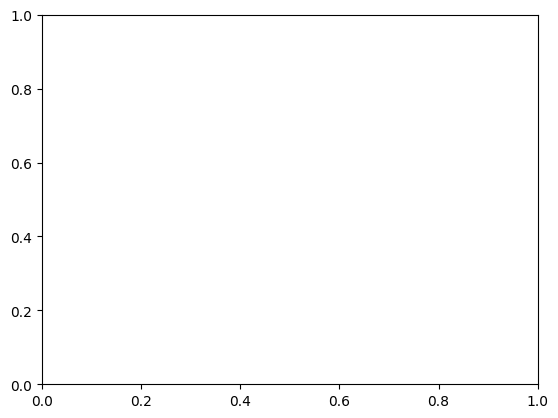

In [31]:
lcCounter = 1 # used to track which lane change the CSP corresponds to.

print("FIRST SET IS 20HZ, SECOND SET IS 10HZ, THIRD SET IS 5 HZ ")

plt.show()

for laneChanges in laneChangeDfs:
    lcCounter = 1
    print("================================================================")
    print("================================================================")
    for df in laneChanges:
        print("Lane change file - " + str(lcCounter) + ": ")

        min = df['morton'].min()
        max = df['morton'].max()
        max = 30000000000

        plt.hist(df['morton'], bins=200)
        #plt.xlim(0,max)
        plt.ylim(0,1)
        plt.show()

        print("-----------------------------")

        lcCounter += 1